In [7]:
## imporing the librarires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import rcParams
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
## importing the dataset
dataset = pd.read_csv("G://ADS//Assignment 2//Modified_energydata_complete(2).csv")
dataset.head()

,Unnamed: 0,date,Time,Energy_consumed,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,...,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,Month_Number,Weekday_number
0,0,2016-01-11,17:00:00,90,60,30,19.89,47.596667,19.2,44.790000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,1,0
1,1,2016-01-11,17:10:00,90,60,30,19.89,46.693333,19.2,44.722500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,1,0
2,2,2016-01-11,17:20:00,80,50,30,19.89,46.300000,19.2,44.626667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,1,0
3,3,2016-01-11,17:30:00,90,50,40,19.89,46.066667,19.2,44.590000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,1,0
4,4,2016-01-11,17:40:00,100,60,40,19.89,46.333333,19.2,44.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,1,0


In [3]:
## X are the varibles used for predictions
## Y is the target
X = dataset.iloc[:,6:33].values
Y = dataset.iloc[:,3].values

In [11]:
## fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Cross Validation

Accuracy mean of training data

In [13]:
#Simple K-Fold cross validation. 10folds.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracies = cross_val_score(estimator=LinearRegression(), X=X_train, y=Y_train,cv=10)
accuracies.mean()

0.15239904076489355

Accuracy mean of testing data

In [12]:
#Simple K-Fold cross validation. 10folds.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracies = cross_val_score(estimator=LinearRegression(), X=X_test, y=Y_test,cv=10)
accuracies.mean()

0.15062309848528005

## Regularization

### Ridge Regression 

In [15]:
from sklearn.linear_model import Ridge
##Training the model
ridgeReg = Ridge(alpha=0.05,normalize=True)
ridgeReg.fit(X_train,Y_train)
pred = ridgeReg.predict(X_test)
##Calculating MSE
MSE = np.mean((pred-Y_test)**2)
print('MSE = ',MSE)
##Calculating Score
print('score = ',ridgeReg.score(X_test,Y_test))

MSE =  9382.80055917
score =  0.141857686408


### Lasso Regression

In [16]:
from sklearn.linear_model import Lasso
##Training the model
lassoReg = Lasso(alpha=0.005,normalize=True)
lassoReg.fit(X_train,Y_train)
pred = lassoReg.predict(X_test)
##Calculating MSE
MSE = np.mean((pred-Y_test)**2)
print('MSE = ',MSE)
##Calculating Score
print('score = ',lassoReg.score(X_test,Y_test))

MSE =  9341.3615211
score =  0.145647662736


### Elastic Net Regression 

In [17]:
from sklearn.linear_model import ElasticNet
##Training the model
ENReg = ElasticNet(alpha=1,l1_ratio=0.5,normalize=False)
ENReg.fit(X_train,Y_train)
pred = ENReg.predict(X_test)
##Calculating MSE
MSE = np.mean((pred-Y_test)**2)
print('MSE = ',MSE)
##Calculating Score
print('score = ',ENReg.score(X_test,Y_test))

MSE =  9458.48110833
score =  0.134936012955


## BIAS - VARIANCE TRADE OFF (LEARNING CURVE)


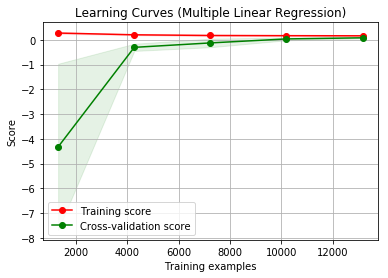

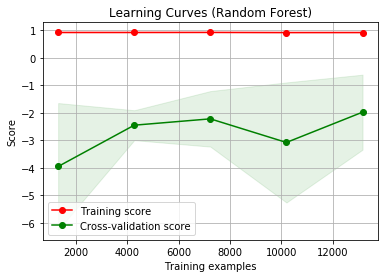

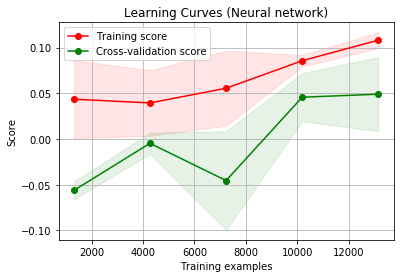

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = X, Y


title = "Learning Curves (Multiple Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=3, n_jobs=4)
plt.show()

title = "Learning Curves (Random Forest)"
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, cv=3, n_jobs=4)
plt.show()

title = "Learning Curves (Neural network)"
estimator = MLPRegressor()
plot_learning_curve(estimator, title, X, y, cv=3, n_jobs=4)
plt.show()

## Grid Search

In [ ]:
from sklearn.grid_search import GridSearchCV

Finding the right parameters (like what C or gamma values to use) is a tricky task! his idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid o

In [27]:
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']}

CV_rfc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv= 5)

In [ ]:
CV_rfc.fit(X_train, Y_train)
print(CV_rfc.best_params_)